In [67]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, BoundaryNorm
import pandas as pd
import plotly.express as px
import os
import pickle
import sys
import plotly.offline as pyo
from pathlib import Path
from sklearn.metrics import ConfusionMatrixDisplay

In [48]:
ROOT_DIR = os.path.dirname(
os.path.dirname(
    str(Path(os.path.abspath('')).absolute())))

sys.path.append(os.path.join(ROOT_DIR, "code"))
from tools.data_loader import TestSet, TestSplit, data_loader
from tools.transform import magnitude_transform
from tools.utils import get_structure_encoding, StructureEncoding


In [49]:

PLOT_ROOT = os.path.join(
    str(Path(os.path.abspath('')).parent.parent.absolute()), "plots/")
PLOT_DIR  = os.path.join(
    str(Path(os.path.abspath('')).parent.parent.absolute()), "plots/decision_boundaries/")

# Load Model

In [50]:
TARGET_NAME = "delta_E_magnitude/"
ENCODING_NAME = "atomic/"
MODEL_NAME = "random_forest_model.pkl"

In [51]:
MODELS_DIR = os.path.join(
    str(Path(os.path.abspath('')).parent.parent.absolute()), "models/", TARGET_NAME, ENCODING_NAME
)

In [52]:
with open(MODELS_DIR + MODEL_NAME, 'rb') as file:
    model = pickle.load(file)

# Load Data Sets

In [53]:
X_TRAIN_NAME = "X_train.csv"
y_TRAIN_NAME = "y_train.csv"

In [54]:
X_train = pd.read_csv(MODELS_DIR + "/datasets/" + X_TRAIN_NAME, index_col=0)
y_train = pd.read_csv(MODELS_DIR + "/datasets/" + y_TRAIN_NAME, index_col=0)

In [55]:
X_TEST_NAME = "X_Parameter gen..csv"
y_TEST_NAME = "y_Parameter gen..csv"

In [56]:
X_test = pd.read_csv(MODELS_DIR + "/datasets/" + X_TEST_NAME, index_col=0)
y_test = pd.read_csv(MODELS_DIR + "/datasets/" + y_TEST_NAME, index_col=0)

In [57]:
X_test.describe()

,ecutrho,k_density,ecutwfc,Ag,Al,Ar,As,Au,B,Ba,...,Tl,Tm,V,W,Xe,Y,Yb,Zn,Zr,total_atoms
count,53958.000000,53958.000000,53958.000000,53958.000000,53958.000000,53958.0,53958.000000,53958.000000,53958.000000,53958.000000,...,53958.000000,53958.000000,53958.000000,53958.000000,53958.0,53958.000000,53958.000000,53958.000000,53958.000000,53958.00000
mean,244.190667,5.894103,56.615423,0.018227,0.016893,0.0,0.014141,0.017560,0.008229,0.006950,...,0.015670,0.010823,0.011212,0.005949,0.0,0.018829,0.013075,0.020266,0.019914,2.01149
std,89.397661,2.819840,23.825105,0.093710,0.090339,0.0,0.082888,0.092042,0.063613,0.058538,...,0.087117,0.072764,0.074031,0.054214,0.0,0.095186,0.079791,0.098602,0.097778,0.15116
min,100.000000,2.000000,20.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.00000
25%,180.000000,4.000000,35.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.00000
50%,260.000000,6.000000,55.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.00000
75%,340.000000,8.000000,75.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.00000
max,380.000000,10.000000,100.000000,0.500000,0.500000,0.0,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.0,0.500000,0.500000,0.500000,0.500000,4.00000


# Plot the confusion matrix

We plot the confusion matrix for the structure generalization test set

In [58]:
X_TEST_NAME = "X_Structure gen..csv"
y_TEST_NAME = "y_Structure gen..csv"
X_test_structure = pd.read_csv(MODELS_DIR + "/datasets/" + X_TEST_NAME, index_col=0)
y_test_structure = pd.read_csv(MODELS_DIR + "/datasets/" + y_TEST_NAME, index_col=0)

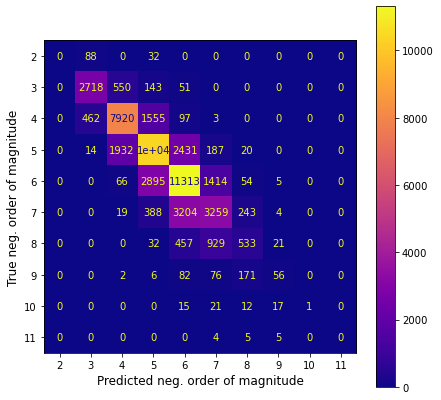

In [59]:
y_pred = model.predict(X_test_structure)
fs=12
fig, ax = plt.subplots(figsize=(7, 7))
ConfusionMatrixDisplay.from_predictions(
    y_test_structure,
    y_pred,
    include_values=True,
    cmap="plasma",
    ax=ax

)
ax.set_xlabel("Predicted neg. order of magnitude", fontsize=fs)
ax.set_ylabel("True neg. order of magnitude", fontsize=fs)
plt.savefig(PLOT_ROOT + "confusion_mat.png")
plt.show()

# Choose a structure

In [60]:
structure_key = 'GeTe'

In [61]:
def filter_data(X, y, structure_key):
    elt1 = structure_key[0:2]
    elt2 = structure_key[2:]
    print(elt1)
    print(elt2)
    
    mask = (X[elt1]*X[elt2]).to_numpy().nonzero()[0]
    print(f"Size of subset for {structure_key}: ", len(mask))
    
    return X.iloc[mask], y.iloc[mask]

In [62]:
X_train, y_train = filter_data(X_train, y_train, structure_key)
X_test, y_test = filter_data(X_test, y_test, structure_key)

Ge
Te
Size of subset for GeTe:  512
Ge
Te
Size of subset for GeTe:  61


# Initialize grid

In [63]:
h = 0.5
x_min_train, x_max_train = X_train['ecutwfc'].min() - 1, X_train['ecutwfc'].max() + 1
y_min_train, y_max_train = X_train['k_density'].min() - 1, X_train['k_density'].max() + 1


x_min_test, x_max_test = X_test['ecutwfc'].min() - 1, X_test['ecutwfc'].max() + 1
y_min_test, y_max_test = X_test['k_density'].min() - 1, X_test['k_density'].max() + 1

x_max = max(x_max_train, x_max_test)
y_max = max(y_max_train, y_max_test)
x_min = min(x_min_train, x_min_test)
y_min = min(y_min_train, y_min_test)


xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# Get decision boundary for a given structure structure

In [64]:
structure_encoding = get_structure_encoding(structure_key, StructureEncoding.ATOMIC)

In [87]:
def assemble_features(xx, yy):
    return np.vstack((4*xx.T, yy.T, xx.T))


def magnitude_prediction(xx, yy, estimator, structure_encoding):
    structure_block = np.stack([structure_encoding for _ in range(len(xx))])
    input = np.vstack((assemble_features(xx, yy), structure_block.T)).T
    #input = pd.DataFrame(input.T, columns=X_train.columns)
    return estimator.predict(input)



estimator_alpha = 1.0 / len(model.estimators_)
for estimator in model.estimators_:
    predictor = lambda xx, yy : magnitude_prediction(xx, yy, estimator, structure_encoding)
    
    Z = -predictor(xx.ravel(), yy.ravel())
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cm)

In [88]:
np.unique(y_train['delta_E'].to_numpy())

array([3, 4, 5, 6, 7, 8, 9])

In [108]:
vmax = max(max(y_train['delta_E']), max(y_test['delta_E']))
vmin = min(min(y_train['delta_E']), min(y_test['delta_E']))
nlabels = len(np.unique(y_train['delta_E'].to_numpy()))
bounds = np.arange(vmin, vmax+1) - 0.5

cm = plt.cm.plasma 
norm = BoundaryNorm(boundaries=bounds, ncolors=nlabels)
norm =  mpl.colors.Normalize(vmin=vmin, vmax=vmax)
norm([3, 4, 5, 6, 7, 8, 9])

masked_array(data=[0.        , 0.16666667, 0.33333333, 0.5       ,
                   0.66666667, 0.83333333, 1.        ],
             mask=False,
       fill_value=1e+20)

[[-2 -2 -2 ... -1 -1 -1]
 [-2 -2 -2 ... -1 -1 -1]
 [-2 -2 -2 ... -1 -1 -1]
 ...
 [-2 -2 -2 ...  1  1  1]
 [-2 -2 -2 ...  1  1  1]
 [-2 -2 -2 ...  1  1  1]]


/Users/philipp/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



(1.0, 10.5)

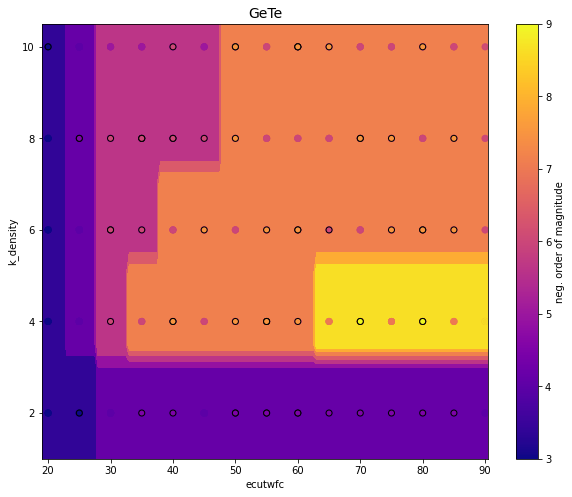

In [117]:

fig, ax = plt.subplots(1, 1, figsize=(10,8))
    
predictor = lambda xx, yy : magnitude_prediction(xx, yy, model, structure_encoding)
sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)

Z = predictor(xx.ravel(), yy.ravel())
Z = Z.reshape(xx.shape)
cs = ax.contourf(xx, yy, Z, alpha=1, cmap=cm)
    
ax.scatter(X_train['ecutwfc'], X_train['k_density'], c=y_train['delta_E'], alpha=0.5, cmap=cm)
ax.scatter(X_test['ecutwfc'], X_test['k_density'], c=y_test['delta_E'], edgecolors="k", cmap=cm)

plt.title(structure_key, fontsize=14)
fig.colorbar(sm, label="neg. order of magnitude")
ax.set_xlabel("ecutwfc")
ax.set_ylabel("k_density")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

In [116]:
Z

array([[-2, -2, -2, ..., -1, -1, -1],
       [-2, -2, -2, ..., -1, -1, -1],
       [-2, -2, -2, ..., -1, -1, -1],
       ...,
       [-2, -2, -2, ...,  1,  1,  1],
       [-2, -2, -2, ...,  1,  1,  1],
       [-2, -2, -2, ...,  1,  1,  1]])

In [1]:
structures = [
    {"name": "NaCl", "rho_factor": 4},
    {"name": "GeTe", "rho_factor": 4},
    {"name": "AgCl", "rho_factor": 4},
]

In [ ]:
for structure in structures:
    print(structure)